In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
seismic_data = np.genfromtxt("data/ProjectTestDataSet2.txt").astype(np.float32)
seismic_data.shape

(9819,)

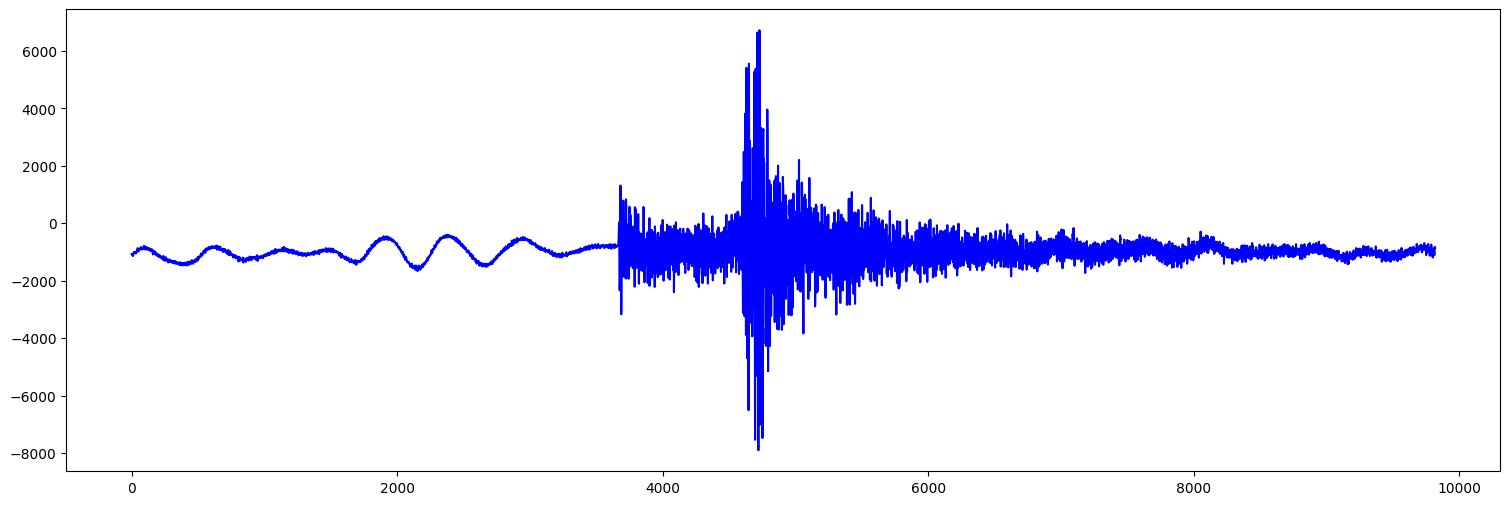

In [2]:
# visualize for good measure
time = [i for i in range(seismic_data.shape[0])]

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

plt.plot(time, seismic_data.T, 'b')

In [3]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [4]:
# put arrays in dictionary for labels
seis_data = {}

seis_data["channel_0"] = seismic_data.T

In [5]:
# warm up for 20 seconds and determine best lags
# (warms up in 9 seconds)
arpwarm = CPD.warm.ARPWarm(seis_data, n0=20, chunks=1)
arpwarm.warmup()

['channel_0']
channel_0: order AR(63)
channel_0: fitting complete
AIC:19046.079140583613
Log-Likelihood:-9458.039570291807
channel_0: innovations generated
Mean:-1.2341436981075265e-10
Std-dev:10.684804674757396



In [6]:
import CPD.benchmark
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [20]:
cpd_earth = CPD.benchmark.Online(arpwarm, k=1, M=2)

In [21]:
change_points, forecasts = cpd_earth.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR cp = ???

STEP 20
STEP 21
STEP 22
channel_0 rejection incremented 1
STEP 23
channel_0 rejection incremented 2
STEP 24
channel_0 rejection incremented 3
channel_0 detected change point! Halting.
STEP 25
change point detected at t=3072


Text(0, 0.5, 'Channel 0 PACF')

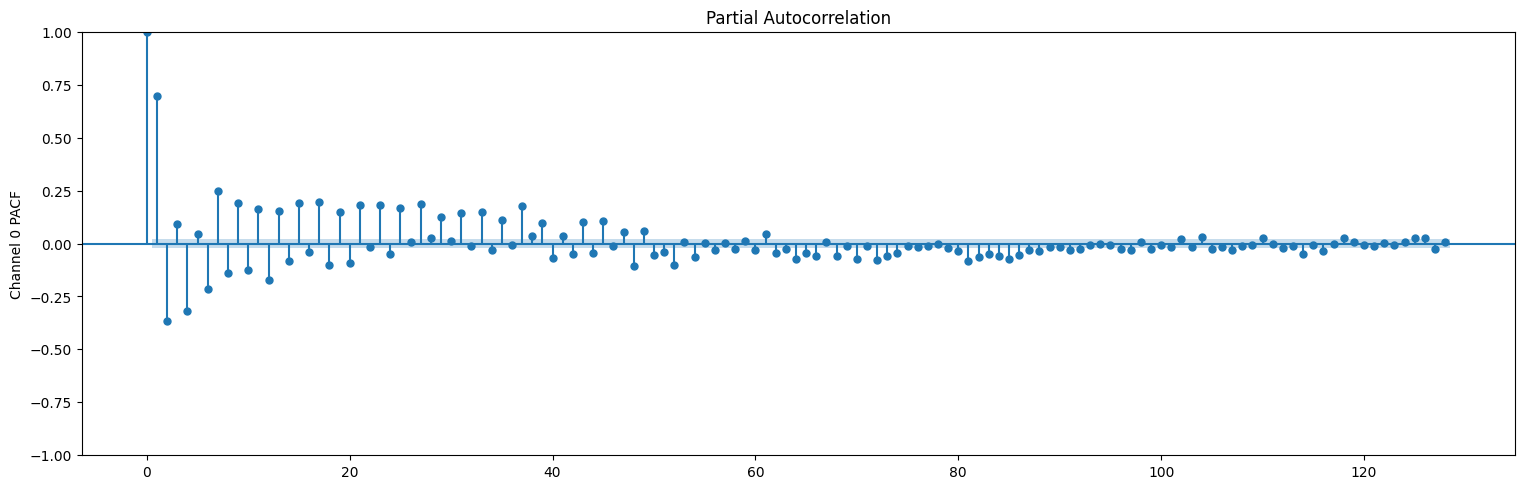

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 5.5)


ts = seis_data["channel_0"][5*128:]
plot_pacf(ts, ax=ax, lags=128)

ax.set_ylabel("Channel 0 PACF")

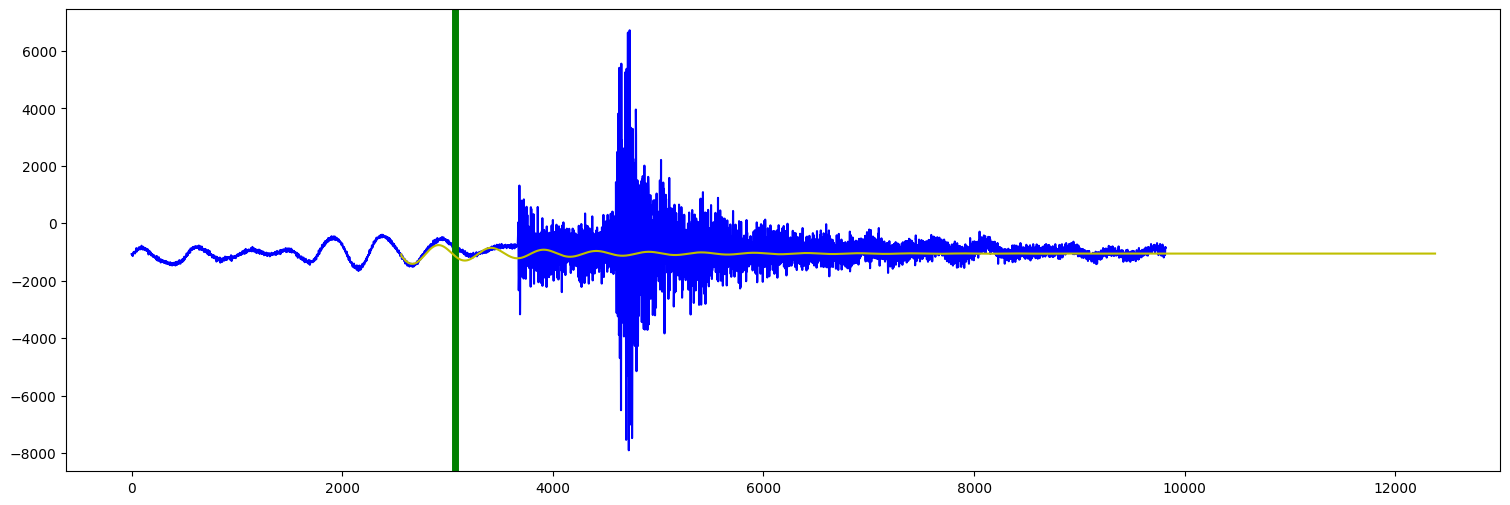

In [23]:
# visualize for good measure

warmup = 20 * 128

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

axs.plot(time, seismic_data.T, 'b')

cpt = change_points["channel_0"]
axs.axvline(x=cpt, c='g', linewidth=5)
fore_time = [warmup + i for i in range(len(forecasts["channel_0"][:time[-1]]))]
axs.plot(fore_time, forecasts["channel_0"][:time[-1]], 'y')